<h1 style='text-align: center;'>FINALS PROJECT</h1>
<hr>
<br>
<h2 style='text-align: center;'>Analyst:</h2>
<h2 style='text-align: center;'>JAY CEE I. MACARAIG | JOHN LOUISE J. ANCAJA</h2>
<h3 style='text-align: center;'>BSIT - 3B</h3>
<hr>

<h2>IMPORTING IMPORTANT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, classification_report, roc_auc_score
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets\\Family Income and Expenditure.csv')

In [3]:
data

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
data.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [5]:
data.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

<hr><br>
<h2>CLEANING DATA TYPES AND FILLING UP NULL VALUES</h2>

In [6]:
necessary_columns =['Total Household Income',
                    'Agricultural Household indicator',
                    'Household Head Job or Business Indicator',
                    'Total Food Expenditure',
                    'Region',
                    'Bread and Cereals Expenditure',
                    'Alcoholic Beverages Expenditure',
                    'Total Rice Expenditure',
                    'Meat Expenditure',
                    'Total Fish and  marine products Expenditure',
                    'Vegetables Expenditure',
                    'Fruit Expenditure',
                    'Crop Farming and Gardening expenses',
                    'Total Number of Family members',
                    'Total number of family members employed',
                    'Members with age less than 5 year old']

df = data[necessary_columns]

df.head()

,Total Household Income,Agricultural Household indicator,Household Head Job or Business Indicator,Total Food Expenditure,Region,Bread and Cereals Expenditure,Alcoholic Beverages Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Vegetables Expenditure,Fruit Expenditure,Crop Farming and Gardening expenses,Total Number of Family members,Total number of family members employed,Members with age less than 5 year old
0,480332,0,With Job/Business,117848,CAR,42140,0,38300,24676,16806,13460,3325,19370,4,1,0
1,198235,0,With Job/Business,67766,CAR,17329,960,13008,17434,11073,7833,2035,0,3,2,0
2,82785,1,With Job/Business,61609,CAR,34182,270,32001,7783,2590,3795,1730,0,6,3,0
3,107589,0,With Job/Business,78189,CAR,34030,480,28659,10914,10812,7887,690,15580,3,2,0
4,189322,0,With Job/Business,94625,CAR,34820,1040,30167,18391,11309,11260,1395,18887,4,2,0


In [7]:
df.dtypes

Total Household Income                          int64
Agricultural Household indicator                int64
Household Head Job or Business Indicator       object
Total Food Expenditure                          int64
Region                                         object
Bread and Cereals Expenditure                   int64
Alcoholic Beverages Expenditure                 int64
Total Rice Expenditure                          int64
Meat Expenditure                                int64
Total Fish and  marine products Expenditure     int64
Vegetables Expenditure                          int64
Fruit Expenditure                               int64
Crop Farming and Gardening expenses             int64
Total Number of Family members                  int64
Total number of family members employed         int64
Members with age less than 5 year old           int64
dtype: object

In [8]:
df.isnull().sum()

Total Household Income                         0
Agricultural Household indicator               0
Household Head Job or Business Indicator       0
Total Food Expenditure                         0
Region                                         0
Bread and Cereals Expenditure                  0
Alcoholic Beverages Expenditure                0
Total Rice Expenditure                         0
Meat Expenditure                               0
Total Fish and  marine products Expenditure    0
Vegetables Expenditure                         0
Fruit Expenditure                              0
Crop Farming and Gardening expenses            0
Total Number of Family members                 0
Total number of family members employed        0
Members with age less than 5 year old          0
dtype: int64

In [9]:
df['Rice_Share'] = (df['Total Rice Expenditure'] / df['Total Food Expenditure']) * 100
df['Protein_Share'] = ((df['Meat Expenditure'] + df['Total Fish and  marine products Expenditure']) / df['Total Food Expenditure'])*100
df['Veggie_Fruit_Share'] = ((df['Vegetables Expenditure'] + df['Fruit Expenditure']) / df['Total Food Expenditure'])*100
df['PerCapita_Protein'] = ((df['Meat Expenditure'] + df['Total Fish and  marine products Expenditure']) / df['Total Number of Family members'])
df['Employment_Ratio'] = df['Total number of family members employed'] / df['Total Number of Family members'] * 100

df['Income_Quintile'] = pd.qcut(df['Total Household Income'], 5, labels=['Q1 (Poorest)', 'Q2', 'Q3', 'Q4', 'Q5 (Richest)'])
df['Has_Under5'] = (df['Members with age less than 5 year old'] > 0).astype(int)
df['Nutrition_Risk'] = ((df['Protein_Share'] < 30) & (df['Veggie_Fruit_Share'] < 20)).astype(int)
df['Rice_Dependent'] = (df['Rice_Share'] > 40).astype(int)
df['High_Food_Insecurity_Risk'] = ((df['Rice_Dependent'] == 1) & (df['Total Household Income'] <= 180000)).astype(int)

df

,Total Household Income,Agricultural Household indicator,Household Head Job or Business Indicator,Total Food Expenditure,Region,Bread and Cereals Expenditure,Alcoholic Beverages Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,...,Rice_Share,Protein_Share,Veggie_Fruit_Share,PerCapita_Protein,Employment_Ratio,Income_Quintile,Has_Under5,Nutrition_Risk,Rice_Dependent,High_Food_Insecurity_Risk
0,480332,0,With Job/Business,117848,CAR,42140,0,38300,24676,16806,...,32.499491,35.199579,14.242923,10370.500000,25.000000,Q5 (Richest),0,0,0,0
1,198235,0,With Job/Business,67766,CAR,17329,960,13008,17434,11073,...,19.195467,42.066818,14.561875,9502.333333,66.666667,Q3,0,0,0,0
2,82785,1,With Job/Business,61609,CAR,34182,270,32001,7783,2590,...,51.942086,16.836826,8.967846,1728.833333,50.000000,Q1 (Poorest),0,1,1,1
3,107589,0,With Job/Business,78189,CAR,34030,480,28659,10914,10812,...,36.653493,27.786517,10.969574,7242.000000,66.666667,Q2,0,1,0,0
4,189322,0,With Job/Business,94625,CAR,34820,1040,30167,18391,11309,...,31.880581,31.387054,13.373844,7425.000000,50.000000,Q3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,1,With Job/Business,44875,XII - SOCCSKSARGEN,23675,0,21542,1476,6120,...,48.004457,16.927019,12.287465,1266.000000,0.000000,Q2,1,1,1,1
41540,137320,1,With Job/Business,31157,XII - SOCCSKSARGEN,2691,0,1273,1886,4386,...,4.085759,20.130308,15.887281,1045.333333,0.000000,Q2,0,1,0,0
41541,133171,2,With Job/Business,45882,XII - SOCCSKSARGEN,28646,0,27339,480,4796,...,59.585458,11.499063,9.278148,1319.000000,25.000000,Q2,0,1,1,1
41542,129500,1,With Job/Business,81416,XII - SOCCSKSARGEN,29996,0,26655,2359,17730,...,32.739265,24.674511,13.356097,2232.111111,0.000000,Q2,0,1,0,0


<br>
<br>
<h1 style='text-align: center;'>EXPLORATORY DATA  ANALYSIS</h2>
<hr>

In [31]:
total = (df['Total Food Expenditure'] / df['Total Household Income'] * 100).mean()
total

np.float64(44.89797107493787)

<br>
<h3><strong>ANALYSIS 1 :</strong> Staple Food (Rice) Dominance in Tight Budgets Per Income Group</h3>
<hr>

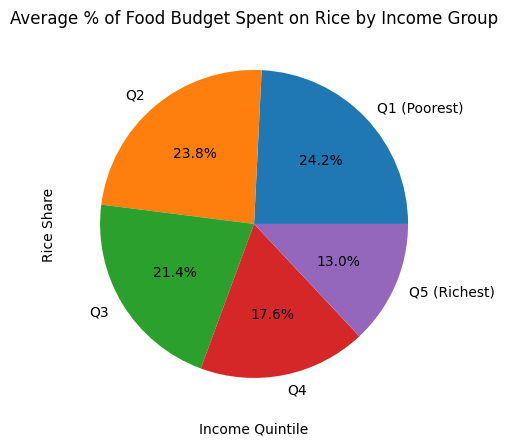

In [11]:
avg_rice = df.groupby('Income_Quintile')['Rice_Share'].mean()


plt.figure(figsize=(15, 5))
plt.pie(avg_rice,
        labels = avg_rice.index,
        autopct = '%1.1f%%')
plt.title('Average % of Food Budget Spent on Rice by Income Group')
plt.ylabel('Rice Share')
plt.xlabel('Income Quintile')
plt.show()

<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 1:</span> The data visualization shows Average Food Budget percentage on Staple Food (Rice) by Income Groups. For the poorest Filipino families, rice isn’t just a staple but a survival strategy. The poorest 20% (Q1) spend nearly a quarter (24.2%) of their entire food budget on rice alone—more than any other income group. This isn’t preference. It’s poverty forcing them to buy calories over nutrition. While wealthier households diversify their meals, the poor are trapped in a cycle where every peso must stretch to fill stomachs, not nourish bodies. The ‘₱500 Noche Buena’ issue ignores this reality: when you’re surviving on ₱500 for three days, you don’t choose vegetables, you choose rice.</p>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 2 :</strong> Protein Distributions of Households with & without children under 5 years old.</h3>
<hr>

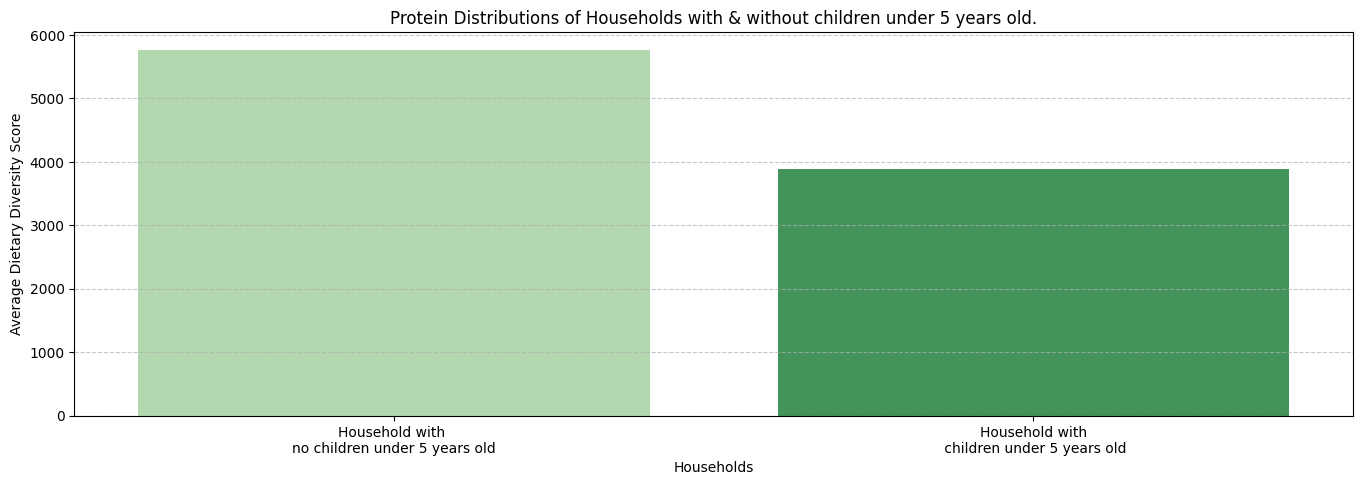

In [12]:
has_Under5 = df.groupby('Has_Under5')['PerCapita_Protein'].mean()
has_Under5.index = has_Under5.index.map({0:'Household with \nno children under 5 years old', 1:'Household with\n children under 5 years old'})
sns.barplot(x=has_Under5.index, y=has_Under5.values, palette='Greens')
plt.title('Protein Distributions of Households with & without children under 5 years old.', fontsize=12)
plt.ylabel('Average Dietary Diversity Score')
plt.xlabel('Households')
plt.tight_layout()
plt.gcf().set_size_inches(15,5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 2:</span> The data visualization shows Comparison of Protein Distribution of Households with & without children under 5 years old. Households with children under five has an imbalance protein distribution. Households with young children spend significantly less per person on protein (₱3,885) than households without them (₱5,756). This isn’t neglection, but maybe priority. Young childrens should have a sufficient nutrion in their body, that's why protein is mostly distributed to them.</p>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 3 :</strong> Rice Dependency and Protein Access Comparison of Regions in the Philippines</h3>
<hr>

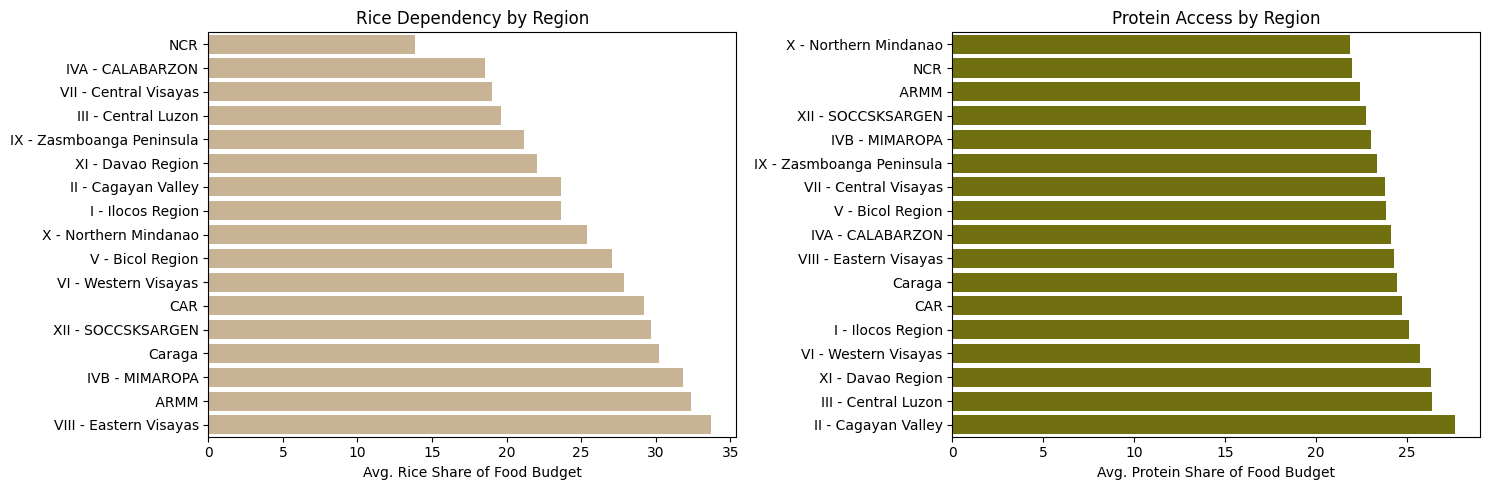

In [13]:
region_rice= df.groupby('Region')['Rice_Share'].mean().reset_index()
region_rice = region_rice.sort_values('Rice_Share', ascending=True)

region_protein = df.groupby('Region')['Protein_Share'].mean().reset_index()
region_protein = region_protein.sort_values('Protein_Share', ascending=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=region_rice, y='Region', x='Rice_Share', ax=ax[0], color='tan')
sns.barplot(data=region_protein, y='Region', x='Protein_Share', ax=ax[1], color='olive')

ax[0].set_title('Rice Dependency by Region')
ax[1].set_title('Protein Access by Region')
ax[0].set_xlabel('Avg. Rice Share of Food Budget')
ax[1].set_xlabel('Avg. Protein Share of Food Budget')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 3:</span> The data visualization shows Comparison of Rice Dependency and Protein Access by Region. In regions like ARMM, Eastern Visayas, and Bicol, families spend over 30% of their food budget on rice alone, while protein access falls below 10%. This isn’t a coincidence but a systemic neglect. While some Region like CAR enjoys diverse diets, these regions are trapped in a cycle of staple dependence: no roads, no markets, no alternatives. The ‘₱500 Noche Buena’ fantasy ignores that in some provinces, ₱500 buys only rice that is not even enough to last three days. Hidden hunger isn’t hidden, it’s just happening far from the capital’s gaze.</p>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 4 :</strong> Fruit & Vegetable Expenditure per Income Class (Q1 (Poorest) - Q5 (Richest)</h3>
<hr>

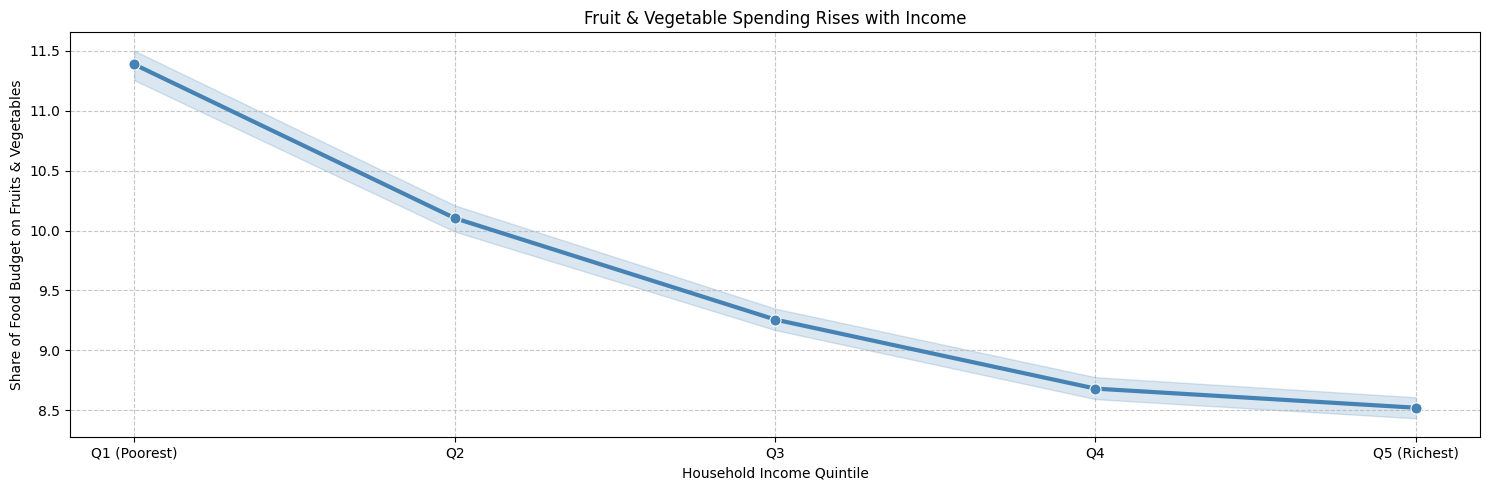

In [14]:
plt.figure(figsize=(15, 5))
sns.lineplot(
    data=df,
    x='Income_Quintile',
    y='Veggie_Fruit_Share',
    marker='o',
    linewidth=3,
    markersize=8,
    color='steelblue'
)
plt.title('Fruit & Vegetable Spending Rises with Income')
plt.ylabel('Share of Food Budget on Fruits & Vegetables')
plt.xlabel('Household Income Quintile')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 4:</span>The data visualization shows a Line Progression of Fruit & Vegetable Expenditure of Income Class from the Poorest to the Richest. Fruits and vegetables aren’t luxuries, they’re lifelines. The poorest 20% (Q1) spend over 11% of their food budget on fruits and vegetables, more than any other group. Why? Because they’re forced to stretch every peso, and fresh products is often the first thing cut when budgets tighten. By the time families reach Q5, they spend less than 9%, not because they eat less, but because they can afford more protein, processed foods, or dining out. The ‘₱500 Noche Buena’ myth collapses here: if even the poor are buying veggies, it’s not because they choose them, it’s because they have no choice but to scrimp on everything else.</p>
<hr>
<br>

<br>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 5 :</strong> Does Job Status Affect Rice Dependence?</h3>
<hr>

In [15]:
households_with_job = df[df['Household Head Job or Business Indicator'] == 'With Job/Business']['Rice_Share']
households_no_job = df[df['Household Head Job or Business Indicator'] == 'No Job/Business']['Rice_Share']

# One-way ANOVA
stats, p_val = f_oneway(households_with_job, households_no_job)

print(f"• Avg Rice Share (With Job): {households_with_job.mean():.0f}%")
print(f"• Avg Rice Share (No Job): {households_no_job.mean():.0f}%")
print(f"• ANOVA F = {stats:.2f}, p = {p_val}")

if p_val < 0.05:
    print("→ Households with stable jobs spend significantly more on rice.")
else:
    print("→ No significant difference by job status.")

• Avg Rice Share (With Job): 25%
• Avg Rice Share (No Job): 22%
• ANOVA F = 260.76, p = 1.7691968056653717e-58
→ Households with stable jobs spend significantly more on rice.


<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 5: </span>Our data shows that households with stable employment spend 25% of their food budget on rice, significantly more than those without jobs (22%). Stable jobs don’t mean stable diets, they mean more rice. When income is predictable, families don’t just focus on protein or vegetables, they stockpile rice, the cheapest, most storable calorie source, as a resolve against future uncertainty. </p>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 6 :</strong> Do Farmers who Grrows and Harvest Vegetables eat more Veggies?</h3>
<hr>

In [16]:
agri_df = df[df['Agricultural Household indicator'] > 0 ]

r = agri_df['Crop Farming and Gardening expenses'].corr(agri_df['Veggie_Fruit_Share'])

print("Diagnostic 2: Do Farmers Who Grow Vegetables Eat More Veggies?")
print(f"• Correlation (Gardening Expenses vs. Veggie/Fruit Share): r = {r:.3f}")

if r >= 0.3:
    print("→ Farmers who invest in vegetable gardening spend more on fruits/vegetables.")
elif r >= 0:
    print("→ Weak link between gardening and diverse eating.")
else:
    print("→ Gardening expenses not linked to better diets.")

Diagnostic 2: Do Farmers Who Grow Vegetables Eat More Veggies?
• Correlation (Gardening Expenses vs. Veggie/Fruit Share): r = 0.084
→ Weak link between gardening and diverse eating.


<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 6: </span>The analysis shows that there is no correlation between being a farmer and having to eat more vegetables. Households engaged in crop farming or gardening spend almost no more on fruits and vegetables than non-farming households (correlation r = 0.084). The people who produce the nation’s food are trapped in the same nutritional poverty as everyone else. They may grow tomatoes, but they can’t afford to eat them—because their labor doesn’t translate into income, and their harvests are sold to survive, not nourish.</p>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 7 :</strong> Does More Earners in a Household means Better Nutrition?</h3>
<hr>

In [17]:
r = df['Employment_Ratio'].corr(df['PerCapita_Protein'])

print("Diagnostic 3: Does More Earners Per Person Mean Better Nutrition?")
print(f"• Correlation (Employment Ratio vs. Per-Person Protein): r = {r}")

if r >= 0.5:
    print("→ Strong link: more earners per person = much higher protein access.")
elif r >= 0.3:
    print("→ Moderate link: employment ratio supports better diets.")
else:
    print("→ Weak link: protein access driven by other factors.")

Diagnostic 3: Does More Earners Per Person Mean Better Nutrition?
• Correlation (Employment Ratio vs. Per-Person Protein): r = 0.15054025512342867
→ Weak link: protein access driven by other factors.


<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 7: </span>The correlation test shows that households with more working members per person show only a weak correlation (r = 0.15) with higher protein access. More earners don’t mean better meals, they mean more mouths to feed. This isn’t about laziness, it’s about economics. When multiple people work, it often means the household is large, poor, or both. Their income gets stretched thinner across more stomachs, diluting nutrition instead of improving it.</p>
<hr>
<br>

<br>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 8 :</strong>  Nutrition Risk Prediction (Logistic Regression)</h3>
<hr>

In [18]:
pred1_df = df[[
    'Nutrition_Risk', 'Total Household Income', 'Total Number of Family members',
    'Members with age less than 5 year old', 'Household Head Job or Business Indicator',
    'Agricultural Household indicator', 'Region'
]].copy()

pred1_df = pred1_df.dropna()

regions_to_num = {
    'I - Ilocos Region': 1,
    'II - Cagayan Valley': 2,
    'III - Central Luzon': 3,
    'IVA - CALABARZON': 4,
    'IVB - MIMAROPA': 5,
    'V - Bicol Region': 6,
    'VI - Western Visayas': 7,
    'VII - Central Visayas': 8,
    'VIII - Eastern Visayas': 9,
    'IX - Zasmboanga Peninsula': 10,
    'X - Northern Mindanao': 11,
    'XI - Davao Region': 12,
    'XII - SOCCSKSARGEN': 13,
    'Caraga': 14,
    'NCR': 15,
    'CAR': 16,
    ' ARMM': 17,
}

# Encode Region
pred1_df['Region'] = pred1_df['Region'].map(regions_to_num)
pred1_df['Household Head Job or Business Indicator'] = pred1_df['Household Head Job or Business Indicator'].map({
    'With Job/Business': 1,
    'No Job/Business': 0,
})

X = pred1_df[['Total Household Income', 'Total Number of Family members',
    'Members with age less than 5 year old', 'Household Head Job or Business Indicator',
    'Agricultural Household indicator', 'Region']]
X = pred1_df.drop('Nutrition_Risk', axis=1)
y = pred1_df['Nutrition_Risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train, y_train)

logistic_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = logistic_model.predict(X_test)
print("Predictive 1: Nutrition Risk Prediction (Logistic Regression)")
print("Accuracy:", accuracy_score(y_test, y_pred))

Predictive 1: Nutrition Risk Prediction (Logistic Regression)
Accuracy: 0.5531351546515826


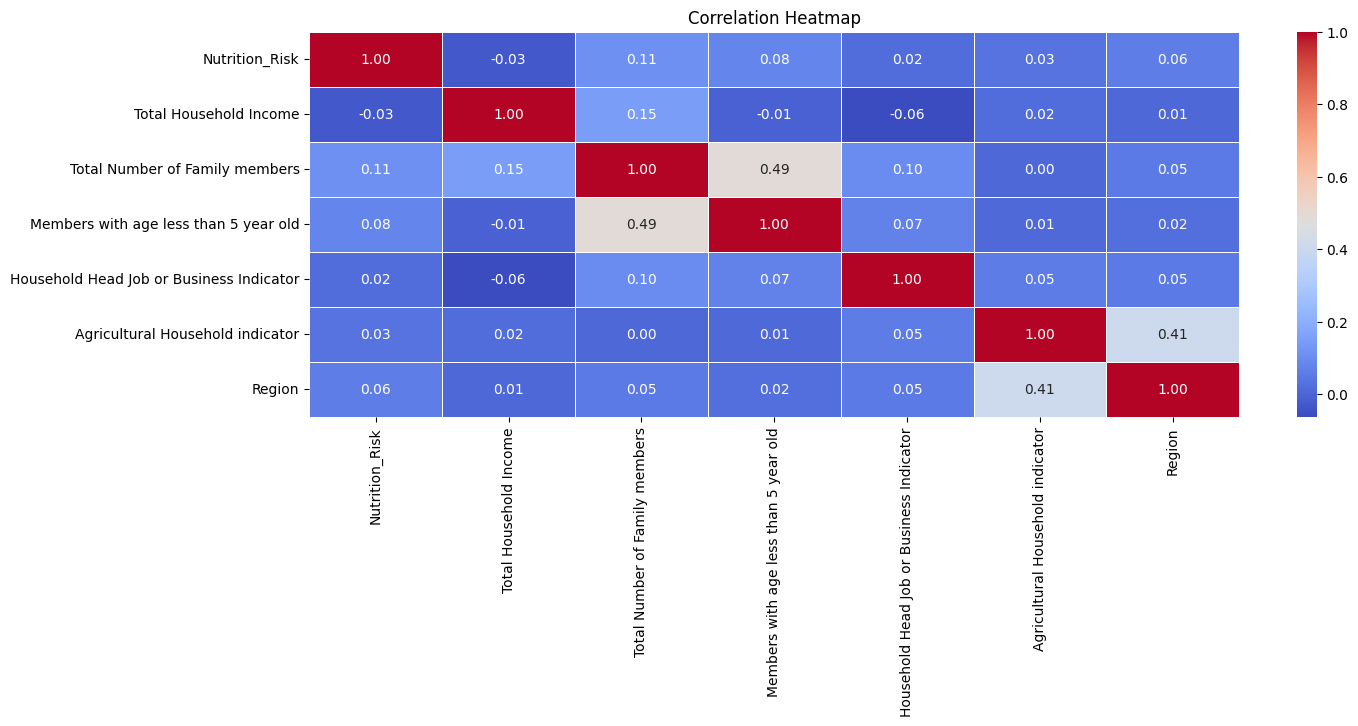

In [20]:
matrix = pred1_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# Example prediction: Poor agricultural household with 3 young kids
income = 10000        
fam_size = 5           
under_5 = 3            
has_job = 0            
agri_household = 0     
region = 4             

prediction_model = pd.DataFrame([[
    income,
    fam_size,
    under_5, 
    has_job, 
    agri_household,   
    region,      
]], columns=X.columns)


risk_pred = logistic_model.predict(prediction_model)
prob = logistic_model.predict_proba(prediction_model)[0][1]

print(f"\nExample Prediction:")
print(f"Household with ₱{income} income, {fam_size} members, {under_5} young kids, {'a' if has_job == 1 else 'no'} job, in region {region}")
print(f"Nutrition Risk: {'YES' if risk_pred == 1 else 'NO'} (Probability: {prob:.1%})")


Example Prediction:
Household with ₱10000 income, 5 members, 3 young kids, no job, in region 4
Nutrition Risk: YES (Probability: 58.0%)


<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 8: </span>The prediction model shows that a poor non-agricultural household with ₱10,000 income, 5 members, 3 young kids, no job, and located in Region 4 has a 58% chance of being nutritionally at-risk. With an accuracy of 55%, this model shows that having an income of ₱10,000 while also having 3 younger kids and maintaining nutrition per family member is a struggle.</p>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 9 :</strong>  Forecasting Meat Expenditure from Income and Job Stability (Linear Regression)</h3>
<hr>

In [22]:
meat_df = df[[
    'Meat Expenditure', 'Total Household Income', 'Household Head Job or Business Indicator',
    'Total number of family members employed', 'Total Number of Family members'
]].copy()

meat_df = meat_df.dropna()
meat_df = meat_df[meat_df['Meat Expenditure'] >= 0]
meat_df['Household Head Job or Business Indicator'] = meat_df['Household Head Job or Business Indicator'].map({
    'With Job/Business': 1,
    'No Job/Business': 0,
})

X = meat_df[['Total Household Income', 'Household Head Job or Business Indicator',
    'Total number of family members employed', 'Total Number of Family members'
]]
y = meat_df['Meat Expenditure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# Evaluate
y_pred = linear_model.predict(X_test)
print("\nPredictive 2: Meat Spending Prediction (Linear Regression)")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: ₱{mean_absolute_error(y_test, y_pred):.2f}")



Predictive 2: Meat Spending Prediction (Linear Regression)
R² Score: 0.35
Mean Absolute Error: ₱5648.98


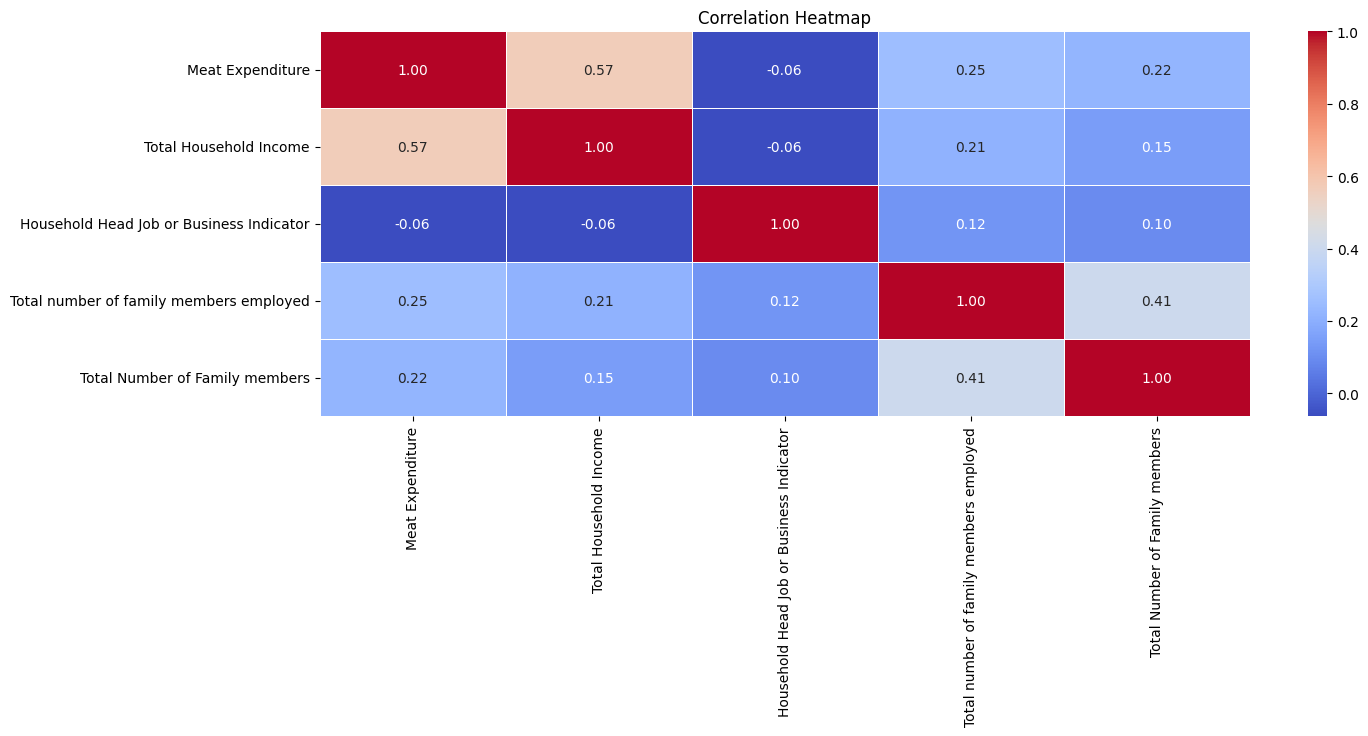

In [24]:
matrix = meat_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# Example: Household with ₱30,000 income, has job, 2 earners, 5 members
income = 30000
has_job = 1
earners = 2
fam_size = 5

example = pd.DataFrame([[income, has_job, earners, fam_size]], columns=X.columns)
meat_pred = linear_model.predict(example)[0]

print(f"\nExample Prediction:")
print(f"Household with ₱{income} income, {'stable job' if has_job == 1 else 'no job'}, {earners} earners, {fam_size} members →")
print(f"Predicted Meat Spending: ₱{meat_pred:.2f} per month")


Example Prediction:
Household with ₱30000 income, stable job, 2 earners, 5 members →
Predicted Meat Spending: ₱7001.20 per month


<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 9: </span>A household earning ₱30,000 with a stable job, 2 earners, and 5 members is predicted to spend only ₱7,001 per month on meat. That’s just ₱140 per person per day, barely enough for one egg or a small serving of fish. This isn’t about taste, it’s about math. Meat isn’t a luxury but a metric of survival. Even with a ‘good’ income, protein remains out of reach for many. </p>
<hr>
<br>

<br>
<h3><strong>ANALYSIS 10 :</strong>  Identifying Rice-Dependent Households (Random Forest)</h3>
<hr>

In [26]:
food_risk_df = df[[
    'High_Food_Insecurity_Risk', 'Total Household Income',
    'Total Number of Family members', 'Agricultural Household indicator',
    'Household Head Job or Business Indicator', 'Region'
]].copy()

food_risk_df = food_risk_df.dropna()
regions_to_num = {
    'I - Ilocos Region': 1,
    'II - Cagayan Valley': 2,
    'III - Central Luzon': 3,
    'IVA - CALABARZON': 4,
    'IVB - MIMAROPA': 5,
    'V - Bicol Region': 6,
    'VI - Western Visayas': 7,
    'VII - Central Visayas': 8,
    'VIII - Eastern Visayas': 9,
    'IX - Zasmboanga Peninsula': 10,
    'X - Northern Mindanao': 11,
    'XI - Davao Region': 12,
    'XII - SOCCSKSARGEN': 13,
    'Caraga': 14,
    'NCR': 15,
    'CAR': 16,
    ' ARMM': 17,
}


food_risk_df['Region'] = food_risk_df['Region'].map(regions_to_num)
food_risk_df['Household Head Job or Business Indicator'] = food_risk_df['Household Head Job or Business Indicator'].map({
    'With Job/Business': 1,
    'No Job/Business': 0,
})

X = food_risk_df[[
    'Total Household Income',
    'Total Number of Family members',
    'Agricultural Household indicator',
    'Household Head Job or Business Indicator',
    'Region'
]]
y = food_risk_df['High_Food_Insecurity_Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

forest_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # ← KEY FIX
)
forest_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
print("Class balance:", y.value_counts(normalize=True))

Class balance: High_Food_Insecurity_Risk
0    0.89339
1    0.10661
Name: proportion, dtype: float64


In [28]:
y_pred = forest_model.predict(X_test)
print("\nPredictive 4: High Food Insecurity Risk (Random Forest)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Risk', 'High Risk']))


Predictive 4: High Food Insecurity Risk (Random Forest)

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.92      0.94      0.93      7423
   High Risk       0.39      0.31      0.35       886

    accuracy                           0.87      8309
   macro avg       0.65      0.63      0.64      8309
weighted avg       0.86      0.87      0.87      8309



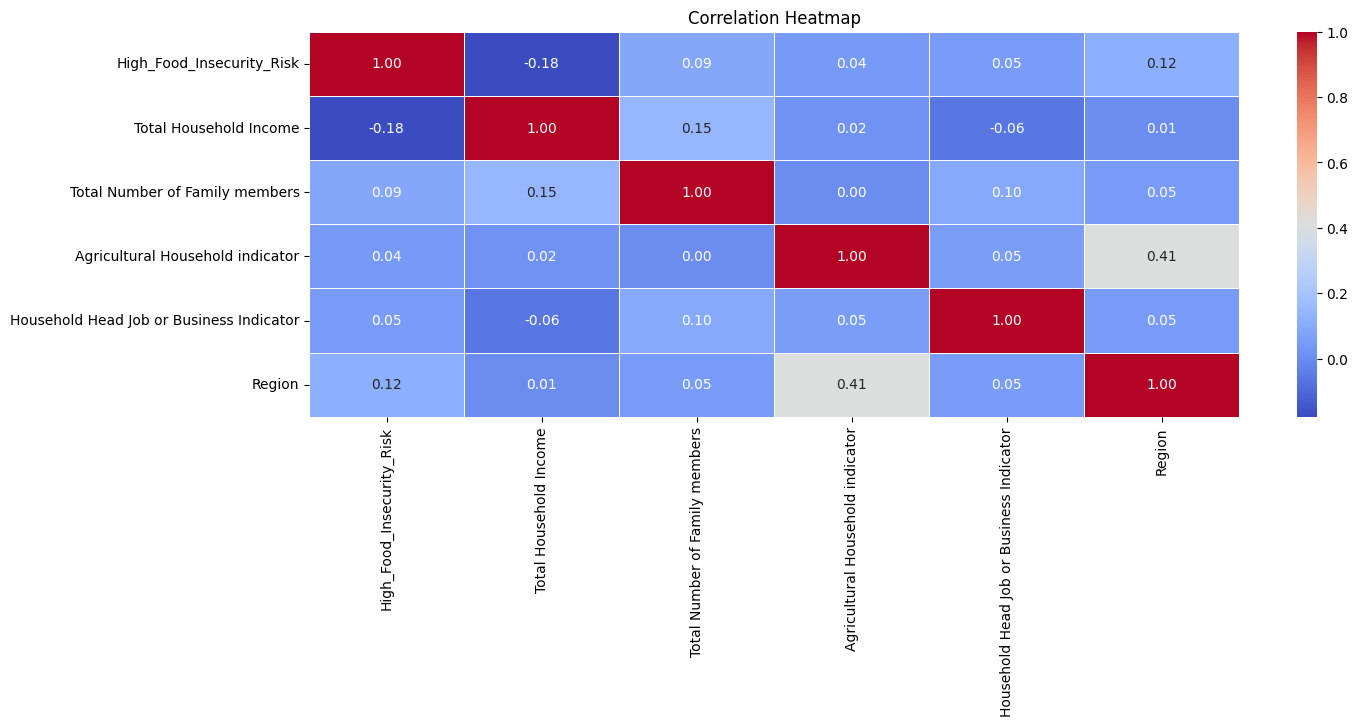

In [29]:
matrix = food_risk_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [30]:
income = 14000
fam_size = 7
agri = 0
has_job = 0
region = 9

example = pd.DataFrame([[
    income,
    fam_size,
    agri,
    has_job,
    region
]], columns=X.columns)

risk_prob = forest_model.predict_proba(example)[0][1]
risk_pred = forest_model.predict(example)[0]

print(f"\nExample Prediction:")
print(f"{'Farmer' if agri == 1 else 'Non-Farmer'} in Region {region}, has ₱{income} income, has {fam_size} members, {'stable job' if has_job == 1 else 'no job'} →")
print(f"High Food Insecurity Risk: {'YES' if risk_pred == 1 else 'NO'} (Probability: {risk_prob:.1%})")


Example Prediction:
Non-Farmer in Region 9, has ₱14000 income, has 7 members, no job →
High Food Insecurity Risk: YES (Probability: 67.0%)


<br>
<p><span style="color: blue; font-weight: bold;">INSIGHT 10: </span>A non-farming household in Region 9, earning ₱14,000, with 7 members and no stable job, has a 67% probability of being at high food insecurity risk because its income falls far below the poverty threshold for a family that size, leaving little for nutritious food; the absence of stable income creates constrains; being non-farming means no access to homegrown food; and Region 9’s remoteness and limited market access drive up food costs, turning every meal into a survival calculation, not a choice. </p>
<hr>
<br>

   <h3 style="text-align: right; margin-right: 80px;">Analyst : Jay Cee I. Macaraig | John Louise J. Ancaja</h3>
   <h3 style="text-align: right; margin-right: 80px;">BSIT-3B</h3>